# Math Symbols and Digits Classifier

In [41]:
import numpy as np
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import time
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

### Pre-Process the data

First, we created a DataFrame that contains all the symbols images, we resized the images to be 28x28.

In [2]:
def images_to_dataframe(images_folder):
    df = pd.DataFrame(columns=[f"column_{i}" for i in range(784)] + ["symbol"])
    for folder in os.listdir(images_folder):
        folder_path = os.path.join(images_folder, folder)
        print(folder)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.endswith('.jpg'):
                    img = Image.open(os.path.join(folder_path, filename))
                    fixed_size = (28, 28)
                    img = img.resize(fixed_size)
                    img = img.convert('L')
                    img_array = list(img.getdata())
                    img_array.append(folder)
                    img_df = pd.DataFrame([img_array], columns=df.columns)
                    df = df.append(img_df, ignore_index=True)
    return df

df = images_to_dataframe("images")
df

+


/var/folders/zs/5hpp8g0j5jb467vfr6bjy2sc0000gn/T/ipykernel_41871/1568393575.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(img_df, ignore_index=True)


-
÷
(
x
)


,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_775,column_776,column_777,column_778,column_779,column_780,column_781,column_782,column_783,symbol
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,+
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,+
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,+
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,+
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7361,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,)
7362,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,)
7363,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,)
7364,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,)


We read the csv as Dataframe for the Digits in order to combine it with the other images.

In [3]:
df1 = pd.read_csv('MNIST_data.csv')
df2 = pd.read_csv('MNIST_target.csv').convert_dtypes(int)

df1 = pd.merge(df1, df2, left_index=True, right_index=True)
df1

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_775,column_776,column_777,column_778,column_779,column_780,column_781,column_782,column_783,symbol
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [ ]:
def display_images(df, num_images=5):
    for i in range(num_images):
        img_data = df.iloc[i, :-1].values
        img_array = np.array(img_data, dtype='uint8').reshape(28, 28)
        img = Image.fromarray(img_array)
        plt.figure()
        plt.imshow(img, cmap='gray')
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.show()

display_images(df)

We merged the 2 DataFrames into one DataFrame to contain all the images.

In [4]:
df = df.append(df1, ignore_index=True)
df

/var/folders/zs/5hpp8g0j5jb467vfr6bjy2sc0000gn/T/ipykernel_41871/1598965858.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1, ignore_index=True)


,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_775,column_776,column_777,column_778,column_779,column_780,column_781,column_782,column_783,symbol
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,+
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,+
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,+
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,+
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
77362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
77363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
77364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


We want to map the symbols [+, -, x, ÷, (, )] to numbers from 10 to 15, in order to convert the data to type int.

In [5]:
df.loc[df['symbol'] == '+', 'symbol'] = 10
df.loc[df['symbol'] == '-', 'symbol'] = 11
df.loc[df['symbol'] == 'x', 'symbol'] = 12
df.loc[df['symbol'] == '÷', 'symbol'] = 13
df.loc[df['symbol'] == '(', 'symbol'] = 14
df.loc[df['symbol'] == ')', 'symbol'] = 15
df.symbol

0        10
1        10
2        10
3        10
4        10
         ..
77361     9
77362     9
77363     9
77364     9
77365     9
Name: symbol, Length: 77366, dtype: object

In [6]:
df = df.convert_dtypes(int)
df.dtypes

column_0      Int64
column_1      Int64
column_2      Int64
column_3      Int64
column_4      Int64
              ...  
column_780    Int64
column_781    Int64
column_782    Int64
column_783    Int64
symbol        Int64
Length: 785, dtype: object

We wanted see how the classes are divided

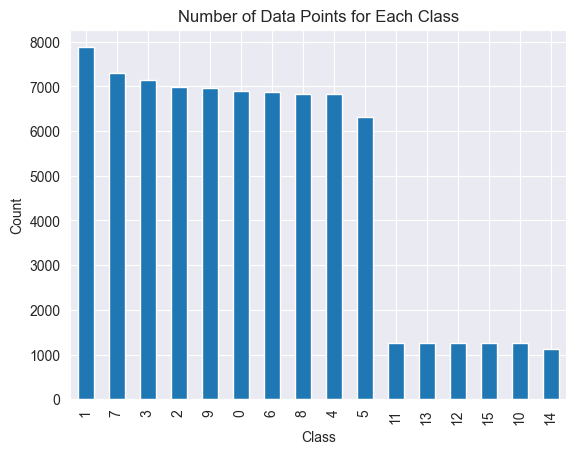

In [7]:
class_counts = df['symbol'].value_counts()

class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Data Points for Each Class')
plt.show()

We see that the data is imbalanced, so we need to balance the data.
We are going to do that after scaling the data.

We want to build a few models, and compare between them.

First, we are going to shuffle the data, so it doesn't learn more on specific class than others or the opposite.

In [8]:
df = df.sample(frac=1, random_state=42)
df.reset_index(drop=True, inplace=True)
df

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_775,column_776,column_777,column_778,column_779,column_780,column_781,column_782,column_783,symbol
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,12
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77361,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,15
77362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
77363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
77364,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,10


split the label from the features:

In [108]:
X = df.drop(columns=['symbol'])
y = df['symbol']

Scale the values by dividing them to 255.

In [109]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

Balancing the data by applying SMOTE:

In [192]:
smote = SMOTE()
X, y = smote.fit_resample(X, np.array(y, dtype=int))

Splitting it into 80:20 train and test respectively:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

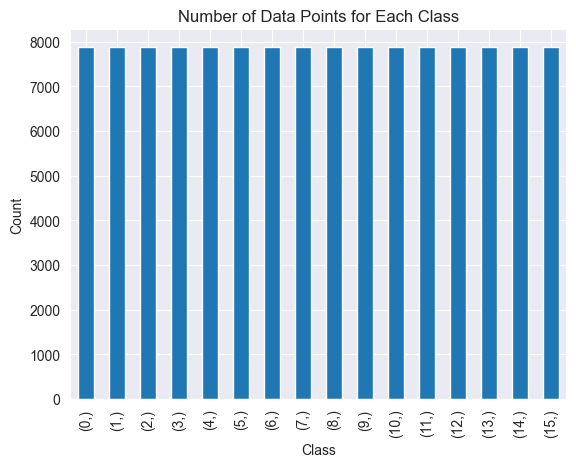

In [207]:
balanced_class_counts = pd.DataFrame(y).value_counts()

balanced_class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Data Points for Each Class')
plt.show()

In [115]:
accuracies = {}

### Logistic Regression

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Python/3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.3min finished


Test Accuracy:  0.9094299202602452
Test Loss:  0.3561688774683642
Train Accuracy:  0.9183436647656831
Train Loss:  0.31349804745426896
Confusion Matrix:
Confusion Matrix for Logistic Regression


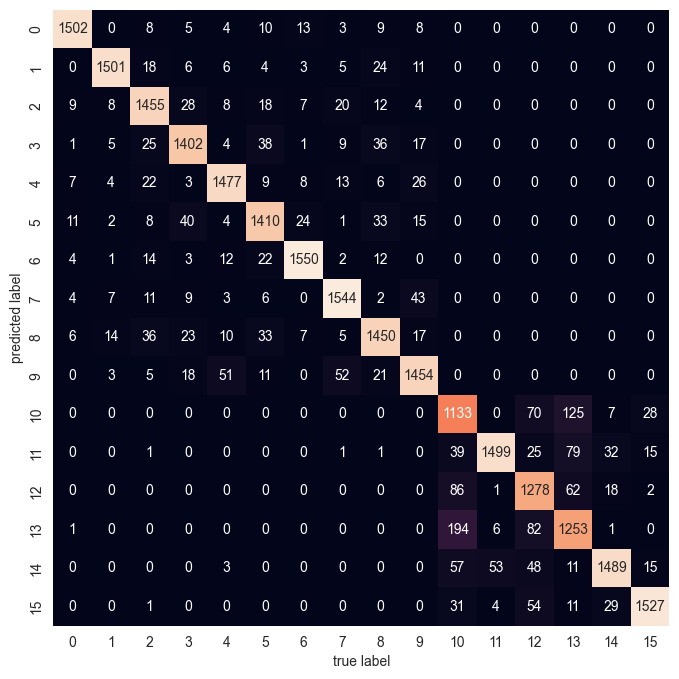

In [200]:
lr_model = LogisticRegression(multi_class='multinomial', max_iter=30, solver='newton-cg',C=1,penalty='l2', verbose=1)
lr_model.fit(X_train, y_train)

lr_test_predictions = lr_model.predict(X_test)
lr_test_acc = accuracy_score(np.array(y_test, dtype=int), np.array(lr_test_predictions, dtype=int))
accuracies['LogisticRegression'] = lr_test_acc
print("Test Accuracy: ", lr_test_acc)
print("Test Loss: ", log_loss(np.array(y_test, dtype=int), lr_model.predict_proba(X_test)))

lr_train_pred = lr_model.predict(X_train)
print("Train Accuracy: ", accuracy_score(np.array(y_train, dtype=int), np.array(lr_train_pred, dtype=int)))
print("Train Loss: ", log_loss(np.array(y_train, dtype=int), lr_model.predict_proba(X_train)))

print("Confusion Matrix:")
plt.figure(1, figsize= (8,8))
cm = confusion_matrix(np.array(y_test, dtype=int), lr_test_predictions)
print("Confusion Matrix for Logistic Regression")
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
plt.close()

### Decision Tree

Train Accuracy:  0.853865608727994
Train Loss: 0.5118176676489687
Test Accuracy:  0.8470266195897965
Test Loss: 0.7246661085153363
Confusion Matrix:
Confusion Matrix for Decision Tree


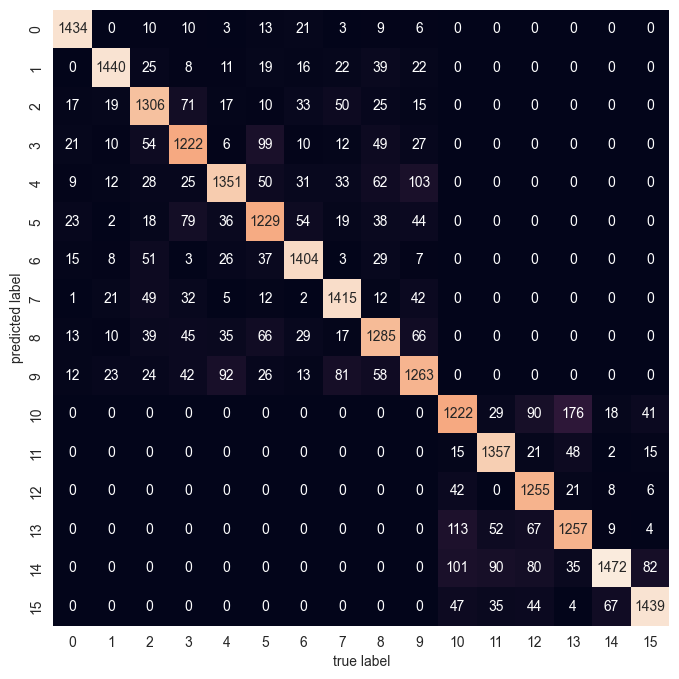

In [211]:
dt_model = DecisionTreeClassifier(max_depth=9)
dt_model.fit(X_train, y_train)

dt_train_predictions = np.array(dt_model.predict(X_train), dtype=int)
print("Train Accuracy: ", accuracy_score(np.array(y_train, dtype=int), dt_train_predictions))
dt_train_loss = log_loss(np.array(y_train, dtype=int), dt_model.predict_proba(X_train))
print("Train Loss:", dt_train_loss)

dt_test_predictions = np.array(dt_model.predict(X_test), dtype=int)
dt_test_acc = accuracy_score(np.array(y_test, dtype=int), dt_test_predictions)
accuracies['DecisionTree'] = dt_test_acc
print("Test Accuracy: ", dt_test_acc)
dt_test_loss = log_loss(np.array(y_test, dtype=int), dt_model.predict_proba(X_test))
print("Test Loss:", dt_test_loss)

print("Confusion Matrix:")
plt.figure(1, figsize= (8,8))
cm = confusion_matrix(np.array(y_test, dtype=int), dt_test_predictions)
print("Confusion Matrix for Decision Tree")
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
plt.close()

### RandomForest model

Train Accuracy: 0.9997917183238284
Train Loss: 0.04475049273693468
Test Accuracy: 0.9827825603998889
Test Loss: 0.14516339864636993
Confusion Matrix:
Confusion Matrix for Random Forest


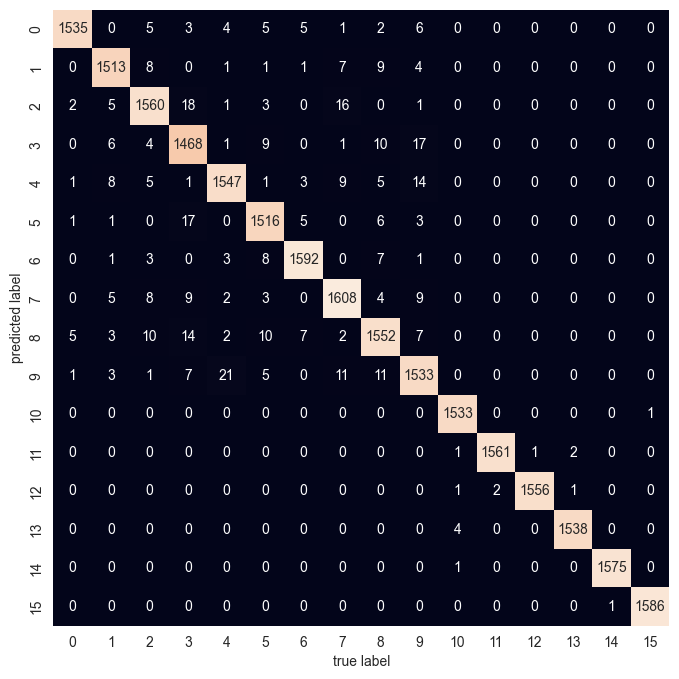

In [195]:
rf_model = RandomForestClassifier(max_depth=30, max_features=0.1)
rf_model.fit(X_train, y_train)

rf_train_predictions = np.array(rf_model.predict(X_train), dtype=int)
train_accuracy = accuracy_score(np.array(y_train, dtype=int), rf_train_predictions)
train_loss = log_loss(np.array(y_train, dtype=int), rf_model.predict_proba(X_train))
print("Train Accuracy:", train_accuracy)
print("Train Loss:", train_loss)

rf_test_predictions = np.array(rf_model.predict(X_test), dtype=int)
test_accuracy = accuracy_score(np.array(y_test, dtype=int), rf_test_predictions)
test_loss = log_loss(np.array(y_test, dtype=int), rf_model.predict_proba(X_test))
accuracies['RandomForest'] = test_accuracy
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

print("Confusion Matrix:")
plt.figure(1, figsize= (8,8))
cm = confusion_matrix(np.array(y_test, dtype=int), rf_test_predictions)
print("Confusion Matrix for Random Forest")
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
plt.close()

In [125]:
print(df["column_29"].value_counts())

0      70000
255     7365
248        1
Name: column_29, dtype: Int64


In [120]:
drop = []
for column in df.columns:
    if len(df[column].unique()) == 2 and 0 in df[column].unique() and 255 in df[column].unique():
        drop.append(column)
print(drop)

['column_0', 'column_1', 'column_18', 'column_19', 'column_20', 'column_21', 'column_22', 'column_23', 'column_24', 'column_25', 'column_26', 'column_27', 'column_28', 'column_52', 'column_53', 'column_54', 'column_55', 'column_56', 'column_82', 'column_83', 'column_84', 'column_111', 'column_112', 'column_560', 'column_672', 'column_700', 'column_701', 'column_728', 'column_729', 'column_730', 'column_754', 'column_755', 'column_756', 'column_757', 'column_758', 'column_759', 'column_782', 'column_783']


### KNN model

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1545
           1       0.95      0.99      0.97      1545
           2       0.99      0.96      0.98      1604
           3       0.98      0.97      0.97      1537
           4       0.98      0.97      0.98      1582
           5       0.96      0.98      0.97      1561
           6       0.98      0.99      0.99      1613
           7       0.97      0.97      0.97      1655
           8       0.99      0.94      0.96      1606
           9       0.96      0.97      0.96      1595
          10       1.00      0.99      0.99      1540
          11       0.97      1.00      0.98      1563
          12       1.00      1.00      1.00      1557
          13       1.00      0.98      0.99      1541
          14       1.00      1.00      1.00      1576
          15       1.00      1.00      1.00      1587

    accuracy                           0.98     25207
   macro avg       0.98   

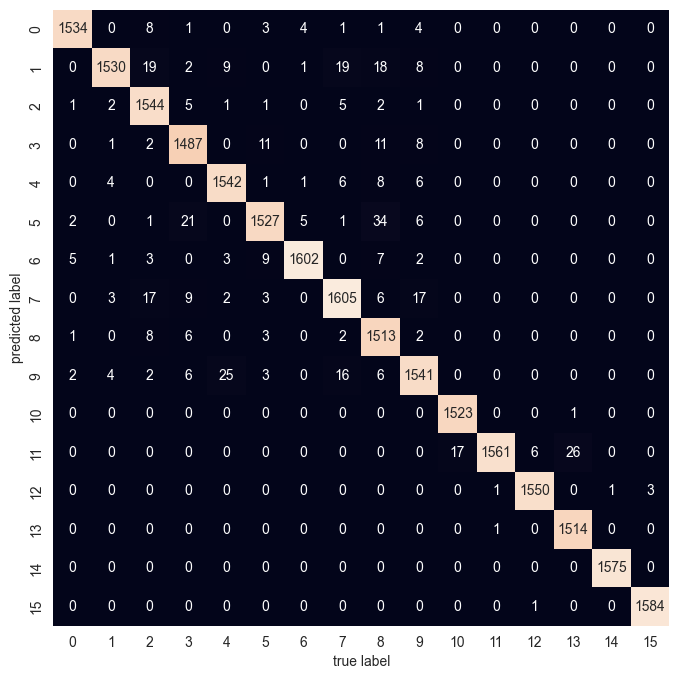

In [217]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train, y_train)

knn_test_pred = knn_model.predict(X_test)
print(classification_report(np.array(y_test, dtype=int), np.array(knn_test_pred, dtype=int)))
knn_test_accuracy = accuracy_score(np.array(y_test, dtype=int), knn_test_pred)
knn_test_loss = log_loss(np.array(y_test, dtype=int), knn_model.predict_proba(X_test))
accuracies['KNN'] = knn_test_accuracy
print("Test Accuracy:", knn_test_accuracy)
print("Test Loss:", knn_test_loss)

knn_train_predictions = knn_model.predict(X_train)
knn_train_accuracy = accuracy_score(np.array(y_train, dtype=int), knn_train_predictions)
knn_train_loss = log_loss(np.array(y_train, dtype=int), knn_model.predict_proba(X_train))
print("Train Accuracy:", knn_train_accuracy)
print("Train Loss:", knn_train_loss)

plt.figure(1, figsize= (8,8))
cm = confusion_matrix(np.array(y_test, dtype=int), np.array(knn_test_pred, dtype=int), labels=None, sample_weight=None)
print("Confusion Matrix for KNN")
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
plt.close()

### XGBoost

Train Accuracy: 0.9999504091247211
Train Loss: 0.0035813428501198395
Test Accuracy: 0.9862339826238743
Test Loss: 0.047140355347898025
Confusion Matrix:
Confusion Matrix for XGBoost


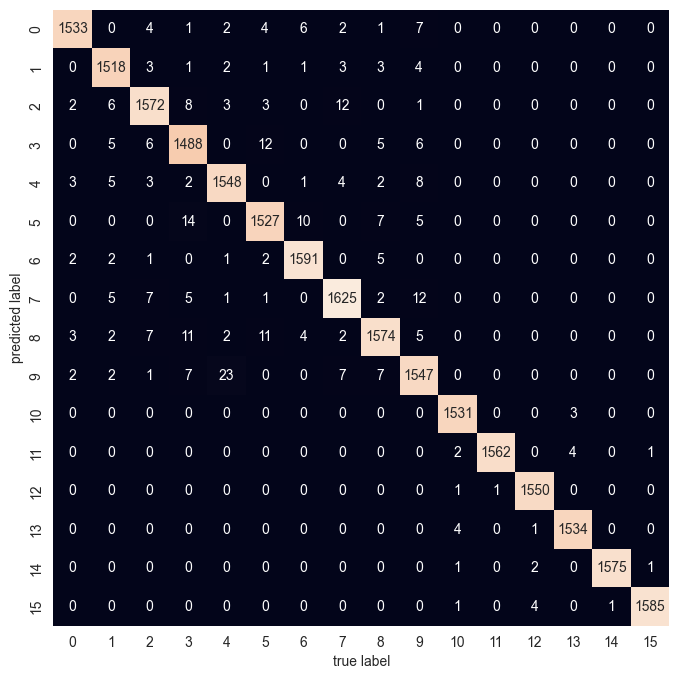

In [218]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

xgb_train_predictions = np.array(xgb_model.predict(X_train), dtype=int)
xgb_train_accuracy = accuracy_score(np.array(y_train, dtype=int), xgb_train_predictions)
xgb_train_loss = log_loss(np.array(y_train, dtype=int), xgb_model.predict_proba(X_train))
print("Train Accuracy:", xgb_train_accuracy)
print("Train Loss:", xgb_train_loss)

xgb_test_predictions = np.array(xgb_model.predict(X_test), dtype=int)
xgb_test_accuracy = accuracy_score(np.array(y_test, dtype=int), xgb_test_predictions)
xgb_test_loss = log_loss(np.array(y_test, dtype=int), xgb_model.predict_proba(X_test))
accuracies['XGBoost'] = xgb_test_accuracy
print("Test Accuracy:", xgb_test_accuracy)
print("Test Loss:", xgb_test_loss)

print("Confusion Matrix:")
plt.figure(1, figsize= (8,8))
cm = confusion_matrix(np.array(y_test, dtype=int), xgb_test_predictions)
print("Confusion Matrix for XGBoost")
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
plt.close()

# Results

In [219]:
accuracies = {key: round(value*100, 2) for key, value in accuracies.items()}
results = pd.DataFrame([accuracies.values()], columns=accuracies.keys())
results.index = ['accuracy']
results

,LogisticRegression,DecisionTree,RandomForest,KNN,XGBoost
accuracy,9094.0,8470.0,9828.0,98.12,98.62


As we can see, XGBoost is the best model for our data, with test accuracy of 98.62 and test loss of 0.04 !

## Thank you !